In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh, norm, expm

%matplotlib widget

# Interaction of a single atom with a 1D simple chain

In [13]:
N = 200 #number of primitive cells
eps = 1. #on-site energy
gam = 1./2. #hopping term

omega0 = 1.0 #atom frequency
g = 0.1 #atom-cavity coupling

Definition of the hamiltonian.

In [20]:
H = np.diag([eps/2]*N + [omega0/2])
H += np.diag([-gam]*(N-1)+[-g],k=1)

H[0,N-1] -= gam

H += np.conjugate(H.transpose())

In [21]:
eigvals, eigvect = eigh(H)

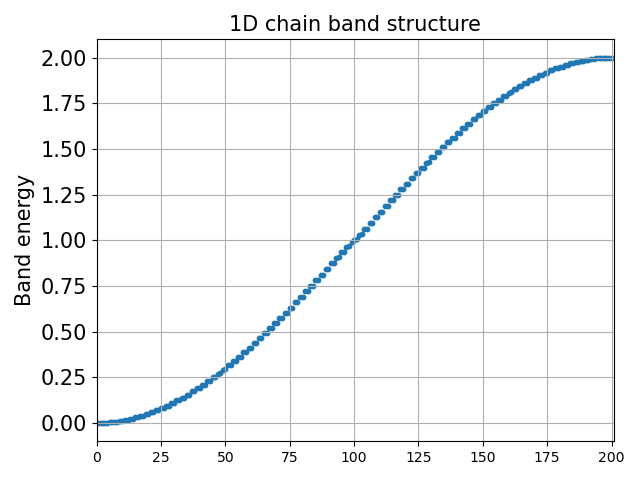

In [22]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("1D chain band structure",fontsize=15)
ax.set_ylabel("Band energy",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()
plt.show()

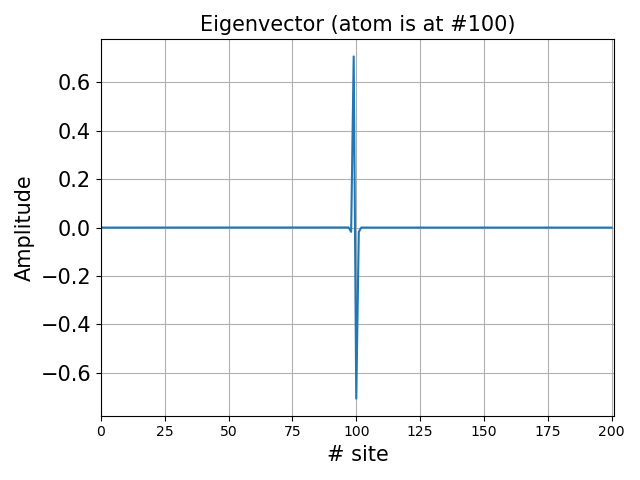

In [7]:
fig, ax = plt.subplots(tight_layout=True)

ax.plot(np.roll(eigvect[:,-1],1+(N//2)))

ax.set_title("Eigenvector (atom is at #100)",fontsize=15)
ax.set_xlabel("# site",fontsize=15)
ax.set_ylabel("Amplitude",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()

plt.show()

In [7]:
t = np.linspace(0,200,100)

psi_in = np.array([0.]*N + [1.])
pop = []

for i in t:
    temp = (expm(-1.j*H*i)@psi_in)[-1]
    pop.append(temp)


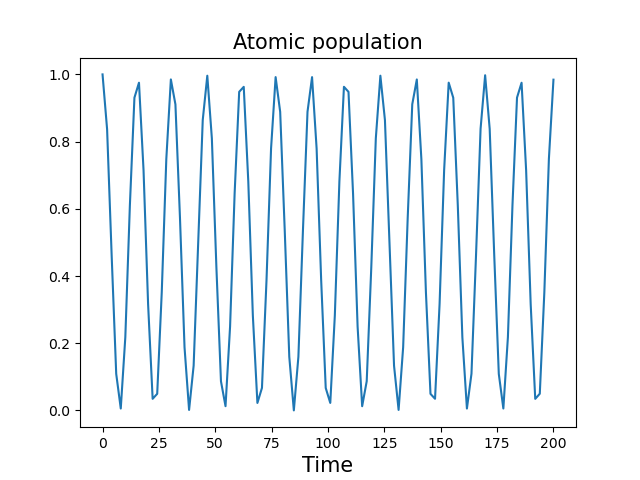

In [8]:
fig = plt.figure()

plt.plot(t,np.real(pop*np.conjugate(pop)))

plt.title("Atomic population",fontsize=15)
plt.xlabel("Time",fontsize=15)

plt.show()